In [11]:
!pip uninstall scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt

### Dataset
<b>keywords.csv </b>: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

<b>credits.csv</b>: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

<b>links.csv</b>: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

<b>links_small.csv</b>: Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

<b>ratings_small.csv</b>: The subset of 100,000 ratings from 700 users on 9,000 movies.

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed [here](https://grouplens.org/datasets/movielens/latest/)

### Basic Analysis

In [2]:
df = pd.read_csv("the-movies-dataset/movies_metadata.csv")
df.head(2)

C:\Users\seab.navin\AppData\Local\Temp\ipykernel_23448\2041284535.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("the-movies-dataset/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


- some data in directionary form so we need to clean linke (genre , language .etc)

In [3]:
df.shape

(45466, 24)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [14]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [6]:
df["overview"].loc[0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [7]:
df1= df.copy()

#### What are the top 10 voted Movie ?


In [8]:
df1.sort_values(by=["vote_average","vote_count"],ascending=False)[["original_title","vote_average"]].head(10)

,original_title,vote_average
32440,Mariposa,10.0
34296,Mera Naam Joker,10.0
35200,Майдан,10.0
36633,Avetik,10.0
42614,Frankie Boyle: Hurt Like You've Never Been Loved,10.0
3160,Gendernauts: A Journey Through Shifting Identi...,10.0
8926,Common Threads: Stories from the Quilt,10.0
21091,Mababangong Bangungot,10.0
21616,Almost Kings,10.0
26170,Katt Williams: Priceless: Afterlife,10.0


#### Does the movie spend more budget has more vote??

<AxesSubplot:xlabel='budget', ylabel='vote_average'>

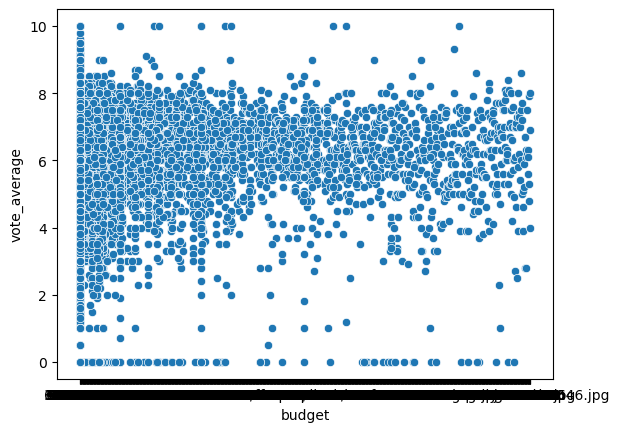

In [9]:
sns.scatterplot(data=df1, x="budget", y="vote_average")

- There is no correlation between budget and average vote
- so even they spend more money they will not able to get more vote

In [12]:
df1["vote_count"] = df1["vote_count"].fillna(0)
# df1["vote_count"] = np.log(df1["vote_count"]).fillna(0)


In [17]:
df1["vote+count"] = 0.5*df1["vote_average"].astype(float) + 0.01*df1["vote_count"]

NameError: name 'df1' is not defined

<AxesSubplot:xlabel='budget', ylabel='vote+count'>

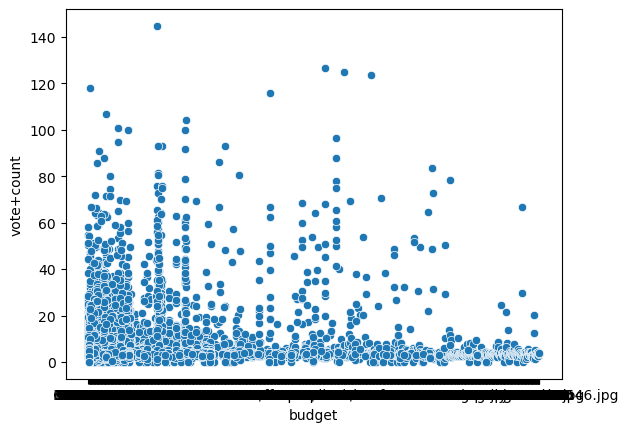

In [51]:
sns.scatterplot(data=df1, x="budget", y="vote+count")

<AxesSubplot:xlabel='budget', ylabel='vote_count'>

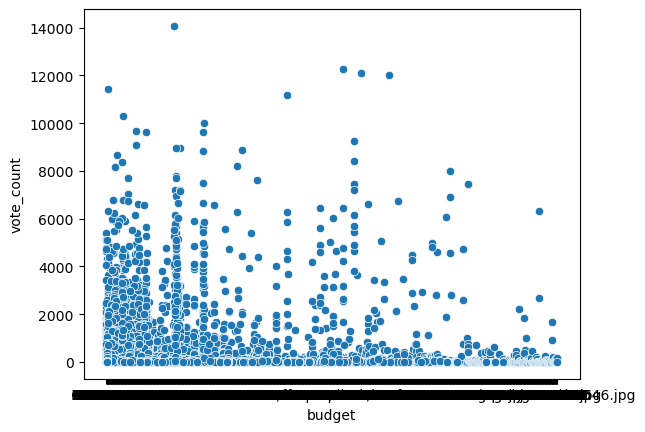

In [52]:
sns.scatterplot(data=df1, x="budget", y="vote_count")

- some data in directionary form so we need to clean linke (genre , language .etc)

## Recommendation Engine

### Popularity

### Popularity
We use the TMDB Ratings to come up with our **Top Movies Chart.** I will use IMDB's *weighted rating* formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
* *v* is the number of votes for the movie
* *m* is the minimum votes required to be listed in the chart
* *R* is the average rating of the movie
* *C* is the mean vote across the whole report

In [3]:
vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.244896612406511

In [4]:
# vote_counts.hist()

In [5]:
# keep only movie that has average_vote more than the 95% quantile
m = vote_counts.quantile(0.95)
m #number of vote

434.0

In [6]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2274, 6)

In [7]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

#### Top10 Movie To Recommend Base On Popularity

In [8]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)
qualified = qualified.sort_values('wr', ascending=False).head(250)
qualified.head(10)[["title","year"]]

,title,year
15480,Inception,2010
12481,The Dark Knight,2008
22879,Interstellar,2014
2843,Fight Club,1999
4863,The Lord of the Rings: The Fellowship of the Ring,2001
292,Pulp Fiction,1994
314,The Shawshank Redemption,1994
7000,The Lord of the Rings: The Return of the King,2003
351,Forrest Gump,1994
5814,The Lord of the Rings: The Two Towers,2002



<img src="https://wompampsupport.azureedge.net/fetchimage?siteId=7575&v=2&jpgQuality=100&width=700&url=https%3A%2F%2Fi.kym-cdn.com%2Fphotos%2Fimages%2Fnewsfeed%2F001%2F599%2F778%2F765.jpg"  width="250" height="250">   Bro I Only Like Fantasy Movie  .....

In [9]:
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [10]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_df = df.drop('genres', axis=1).join(s)

C:\Users\seab.navin\AppData\Local\Temp\ipykernel_23448\400877601.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


In [11]:
def build_chart_g(genre, percentile=0.85):
    df = gen_df[gen_df['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    # print( qualified)
    qualified['wr'] =  (qualified['vote_count']/(qualified['vote_count']+m) * qualified['vote_average']) + (m/(m+qualified['vote_count']) * C)
    qualified = qualified.sort_values('wr', ascending=False).drop_duplicates(subset=["title"]).head(250)
    
    return qualified[["title","year"]]

##### Here you go bro ...

In [13]:
build_chart_g("Fantasy").head(10)

,title,year
4863,The Lord of the Rings: The Fellowship of the Ring,2001
7000,The Lord of the Rings: The Return of the King,2003
5814,The Lord of the Rings: The Two Towers,2002
3030,The Green Mile,1999
5481,Spirited Away,2001
9698,Howl's Moving Castle,2004
2884,Princess Mononoke,1997
5833,My Neighbor Totoro,1988
926,It's a Wonderful Life,1946
14551,Avatar,2009


### Content base
- we use small dataset instead of full dataset because of our computational resource

#### TFIDF Vectorizor
![](https://miro.medium.com/max/1400/1*WnIj9dn7cEYlx_d5xhdROQ@2x.jpeg)



#### Cosine Similarity

We will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movie

![](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2015/04/cosine.png)


Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's **linear_kernel** instead of cosine_similarities since it is much faster.

In [26]:
# !pip install scikit-learn

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [19]:
links_small = pd.read_csv('the-movies-dataset/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [20]:
links_small

0          862
1         8844
2        15602
3        31357
4        11862
         ...  
9120    402672
9121    315011
9122    391698
9123    137608
9124    410803
Name: tmdbId, Length: 9112, dtype: int32

In [28]:
# drop this because it didn't have imdb id
# df = df.drop([19730, 29503, 35587])

- These movies doesn't have imdbId

In [88]:
# df

In [29]:
df['id'] = df['id'].astype('int')

In [33]:
has_imdb = df[df['id'].isin(links_small)]
has_imdb.shape

(9099, 25)

In [34]:
has_imdb['tagline'] = has_imdb['tagline'].fillna('')
has_imdb['description'] =has_imdb['overview'] + has_imdb['tagline']
has_imdb['description'] = has_imdb['description'].fillna('')

C:\Users\seab.navin\AppData\Local\Temp\ipykernel_23448\908208565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_imdb['tagline'] = has_imdb['tagline'].fillna('')
C:\Users\seab.navin\AppData\Local\Temp\ipykernel_23448\908208565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_imdb['description'] =has_imdb['overview'] + has_imdb['tagline']
C:\Users\seab.navin\AppData\Local\Temp\ipykernel_23448\908208565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [35]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(has_imdb['description'])

In [39]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [40]:
cosine_sim[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

We now have a pairwise cosine similarity matrix for all the movies in our dataset. The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [42]:
has_imdb = has_imdb.reset_index()
titles = has_imdb['title']
indices = pd.Series(has_imdb.index, index=has_imdb['title'])

In [44]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [45]:
get_recommendations('Spider-Man').head(10)

6676                 Spider-Man 3
8531     The Amazing Spider-Man 2
8066       The Amazing Spider-Man
5476                 Spider-Man 2
5219        Bang Bang You're Dead
4087                  The New Guy
7488                     Kick-Ass
1563    Gremlins 2: The New Batch
3057              Mad About Mambo
6432                    Clerks II
Name: title, dtype: object

### Metadata Based Recommender

To build our standard metadata based content recommender, we will need to merge our current dataset with the crew and the keyword datasets. Let us prepare this data as our first step.

In [56]:
credits = pd.read_csv('the-movies-dataset/credits.csv')
keywords = pd.read_csv('the-movies-dataset/keywords.csv')

In [57]:
df = df.merge(credits, on='id')
df = df.merge(keywords, on='id')

### Collaborative Filtering
- we want to provide user more personalize and 
- we will use a technique called **Collaborative Filtering** to make recommendations to Movie Watchers. Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

![](https://www.lfgdating.com/gamer-dating-blog/wp-content/uploads/2015/08/1452262.jpg)
I will not be implementing Collaborative Filtering from scratch. Instead, I will use the **Surprise** library that used extremely powerful algorithms like **Singular Value Decomposition (SVD)** to minimise RMSE (Root Mean Square Error) and give great recommendations.

In [53]:
# !pip install scikit-surprise

In [54]:
# from surprise import Reader, Dataset, SVD, evaluate